In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [40]:
top_works_df = pd.read_csv('topworks.csv')

In [53]:
top_works_df.drop("Unnamed: 10", axis=1, inplace=True)

In [95]:
top_works_df

,Artwork,Artist_Name,Price_Sold,Date,Auction_House,Month,Year
0,Salvator Mundi (c.1500),Leonardo DA VINCI,450312500,15 Nov. 2017,Christie’s New York,11,2017
1,Screens of landscapes) (1925),QI Baishi,140954580,17 Dec. 2017,Poly International Beijing,12,2017
2,Untitled (1982),Jean-Michel BASQUIAT,110487500,18 May. 2017,Sotheby’s New York,5,2017
3,Laboureur dans un champ (1889),Vincent VAN GOGH,81312500,13 Nov. 2017,Christie’s New York,11,2017
4,Contraste de formes (1913),Fernand LÉGER,70062500,13 Nov. 2017,Christie’s New York,11,2017
...,...,...,...,...,...,...,...
295,Yizhou pavilion (苏轼舣舟亭图),QIAN Weicheng,10636626,19 Nov. 2019,China Guardian Beijing,11,2019
296,Sabado por la Noche (Saturday Night) (周六晚上) (1...,Jean-Michel BASQUIAT,10634797,25 Jun. 2019,Christie’s London,6,2019
297,Four Big (1982),Jean-Michel BASQUIAT,10611891,4 Oct. 2019,Christie’s London,10,2019
298,Poems in Large Running Script (1553),WEN Zhengming,10603017,27 May. 2019,Christie’s Hong Kong,5,2019


In [30]:
top_artists_df = pd.read_csv('totalartistturnover.csv')

In [33]:
top_artists_df.drop([78], inplace=True)

In [73]:
top_artists_df

,Artist_Name,SUM of Sold_Lots,SUM of Total_Auction_Turnover(per year),PRODUCT of Unsold_Rate,Unsold_Rate
0,ZHANG Daqian,1673,582830675,29%,29
1,ZAO Wou-Ki,1284,720226957,13%,13
2,Yoshitomo NARA,390,100480558,14%,14
3,Yayoi KUSAMA,2016,302581370,14%,14
4,XU Beihong,362,185041701,35%,35
...,...,...,...,...,...
73,Camille PISSARRO,130,49892609,33%,33
74,Andy WARHOL,4526,741808186,22%,22
75,Amedeo MODIGLIANI,82,254819312,23%,23
76,Alexander CALDER,1388,242892219,16%,16


In [78]:
unsold_rate = []

for percent in top_artists_df["PRODUCT of Unsold_Rate"]:
    percent = str(percent)
    percent = percent.replace("%", "")
    percent = int(percent)
    unsold_rate.append(percent)

unsold_rate

[29,
 13,
 14,
 14,
 35,
 22,
 0,
 26,
 0,
 21,
 0,
 0,
 19,
 0,
 20,
 30,
 0,
 22,
 28,
 0,
 27,
 8,
 0,
 0,
 24,
 0,
 23,
 23,
 21,
 19,
 0,
 12,
 31,
 18,
 0,
 28,
 4,
 31,
 29,
 0,
 14,
 0,
 7,
 26,
 31,
 22,
 22,
 0,
 0,
 29,
 0,
 0,
 40,
 0,
 24,
 0,
 0,
 27,
 17,
 13,
 22,
 0,
 0,
 0,
 15,
 11,
 0,
 33,
 0,
 8,
 0,
 24,
 0,
 33,
 22,
 23,
 16,
 23]

In [79]:
top_artists_df['Unsold_Rate'] = unsold_rate

In [80]:
modelling_df = pd.merge(top_artists_df, top_works_df, how='outer')

In [82]:
modelling_df

,Artist_Name,SUM of Sold_Lots,SUM of Total_Auction_Turnover(per year),PRODUCT of Unsold_Rate,Unsold_Rate,Artwork,Price_Sold,Date,Auction_House,Month,Year
0,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Landscape after Dong Yuan (1946),19992233.0,18 Dec. 2017,China Guardian Beijing,12.0,2017.0
1,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Kuan Yin of the water moon (1943),15298404.0,18 Dec. 2017,China Guardian Beijing,12.0,2017.0
2,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Ancient temples amidst clouds (1965),13145618.0,30 May. 2017,Christie’s Hong Kong,5.0,2017.0
3,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Manchurian Mountains (1969),20722220.0,2 Apr. 2019,Sotheby’s Hong Kong,4.0,2019.0
4,ZHANG Daqian,1673.0,582830675.0,29%,29.0,La Beauté Antique (驚才絕豔) (1953),12327030.0,27 May. 2019,Holly International Hong Kong,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
311,Lee KRASNER,NaN,NaN,NaN,NaN,The Eye Is the First Circle,11654000.0,16 May. 2019,Sotheby’s New York,5.0,2019.0
312,Chaïm SOUTINE,NaN,NaN,NaN,NaN,La Femme en rouge (c.1923/24),10970600.0,14 May. 2019,Sotheby’s New York,5.0,2019.0
313,Brice MARDEN,NaN,NaN,NaN,NaN,Number Two (1983/84),10920600.0,14 Nov. 2019,Sotheby’s New York,11.0,2019.0
314,DONG Gao,NaN,NaN,NaN,NaN,Album of Jinling’s ten places of interest,10707587.0,24 Nov. 2019,Holly International Hong Kong,11.0,2019.0


In [86]:
modelling_df.rename(columns = {"SUM of Total_Auction_Turnover(per year)": "Total_Auction_Turnover", "SUM of Sold_Lots": "Total_Sold_Lots"}, inplace=True)
modelling_df

,Artist_Name,Total_Sold_Lots,Total_Auction_Turnover,PRODUCT of Unsold_Rate,Unsold_Rate,Artwork,Price_Sold,Date,Auction_House,Month,Year
0,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Landscape after Dong Yuan (1946),19992233.0,18 Dec. 2017,China Guardian Beijing,12.0,2017.0
1,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Kuan Yin of the water moon (1943),15298404.0,18 Dec. 2017,China Guardian Beijing,12.0,2017.0
2,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Ancient temples amidst clouds (1965),13145618.0,30 May. 2017,Christie’s Hong Kong,5.0,2017.0
3,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Manchurian Mountains (1969),20722220.0,2 Apr. 2019,Sotheby’s Hong Kong,4.0,2019.0
4,ZHANG Daqian,1673.0,582830675.0,29%,29.0,La Beauté Antique (驚才絕豔) (1953),12327030.0,27 May. 2019,Holly International Hong Kong,5.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
311,Lee KRASNER,NaN,NaN,NaN,NaN,The Eye Is the First Circle,11654000.0,16 May. 2019,Sotheby’s New York,5.0,2019.0
312,Chaïm SOUTINE,NaN,NaN,NaN,NaN,La Femme en rouge (c.1923/24),10970600.0,14 May. 2019,Sotheby’s New York,5.0,2019.0
313,Brice MARDEN,NaN,NaN,NaN,NaN,Number Two (1983/84),10920600.0,14 Nov. 2019,Sotheby’s New York,11.0,2019.0
314,DONG Gao,NaN,NaN,NaN,NaN,Album of Jinling’s ten places of interest,10707587.0,24 Nov. 2019,Holly International Hong Kong,11.0,2019.0


In [110]:
artist_name_dummies = pd.get_dummies(modelling_df['Artist_Name']) 
artist_name_dummies = artist_name_dummies.drop(["Alberto GIACOMETTI"], axis=1)
artist_name_dummies

,Alexander CALDER,Amedeo MODIGLIANI,Andy WARHOL,CHEN Rong,CUI Ruzhuo,Christopher WOOL,Claude MONET,Constantin BRANCUSI,Cy TWOMBLY,David HOCKNEY,...,SU Shi,Sigmar POLKE,Vincent VAN GOGH,WU Changshuo,WU Guanzhong,Wassily KANDINSKY,Willem DE KOONING,Yoshitomo NARA,ZAO Wou-Ki,ZHANG Daqian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
modelling_df = pd.concat([modelling_df, artist_name_dummies], axis=1)

In [113]:
modelling_df = modelling_df.dropna()

In [114]:
modelling_df.head(50)

,Artist_Name,Total_Sold_Lots,Total_Auction_Turnover,PRODUCT of Unsold_Rate,Unsold_Rate,Artwork,Price_Sold,Date,Auction_House,Month,...,SU Shi,Sigmar POLKE,Vincent VAN GOGH,WU Changshuo,WU Guanzhong,Wassily KANDINSKY,Willem DE KOONING,Yoshitomo NARA,ZAO Wou-Ki,ZHANG Daqian
0,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Landscape after Dong Yuan (1946),19992233.0,18 Dec. 2017,China Guardian Beijing,12.0,...,0,0,0,0,0,0,0,0,0,1
1,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Kuan Yin of the water moon (1943),15298404.0,18 Dec. 2017,China Guardian Beijing,12.0,...,0,0,0,0,0,0,0,0,0,1
2,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Ancient temples amidst clouds (1965),13145618.0,30 May. 2017,Christie’s Hong Kong,5.0,...,0,0,0,0,0,0,0,0,0,1
3,ZHANG Daqian,1673.0,582830675.0,29%,29.0,Manchurian Mountains (1969),20722220.0,2 Apr. 2019,Sotheby’s Hong Kong,4.0,...,0,0,0,0,0,0,0,0,0,1
4,ZHANG Daqian,1673.0,582830675.0,29%,29.0,La Beauté Antique (驚才絕豔) (1953),12327030.0,27 May. 2019,Holly International Hong Kong,5.0,...,0,0,0,0,0,0,0,0,0,1
5,ZAO Wou-Ki,1284.0,720226957.0,13%,13.0,29/01/64 (1964),25944956.0,25 Nov. 2017,Christie’s Hong Kong,11.0,...,0,0,0,0,0,0,0,0,1,0
6,ZAO Wou-Ki,1284.0,720226957.0,13%,13.0,29/09/64 (1964),19611938.0,27 May. 2017,Christie’s Hong Kong,5.0,...,0,0,0,0,0,0,0,0,1,0
7,ZAO Wou-Ki,1284.0,720226957.0,13%,13.0,Juin-Octobre 1985 (1985),65204489.0,30 Sep 2018,Sotheby’s Hong Kong,9.0,...,0,0,0,0,0,0,0,0,1,0
8,ZAO Wou-Ki,1284.0,720226957.0,13%,13.0,Et la terre était sans forme (1956-1957),23305301.0,29 Mar 2018,Poly Auction Hong Kong,3.0,...,0,0,0,0,0,0,0,0,1,0
9,ZAO Wou-Ki,1284.0,720226957.0,13%,13.0,14/12/59 (1959),22525369.0,26 May 2018,Christie’s Hong Kong,5.0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
modelling_df.corr()

,Total_Sold_Lots,Total_Auction_Turnover,Unsold_Rate,Price_Sold,Month,Year,Alexander CALDER,Amedeo MODIGLIANI,Andy WARHOL,CHEN Rong,...,SU Shi,Sigmar POLKE,Vincent VAN GOGH,WU Changshuo,WU Guanzhong,Wassily KANDINSKY,Willem DE KOONING,Yoshitomo NARA,ZAO Wou-Ki,ZHANG Daqian
Total_Sold_Lots,1.000000,0.827216,0.186798,0.044809,-0.143769,-0.082703,-0.006074,-0.075627,0.212701,-0.035359,...,-0.035337,-0.032447,-0.069802,-0.019498,-0.044157,-0.069516,-0.062950,-0.037758,-0.023450,0.004732
Total_Auction_Turnover,0.827216,1.000000,0.120493,0.027170,-0.128341,-0.046437,-0.051862,-0.078364,0.129907,-0.066493,...,-0.064913,-0.067349,-0.077102,-0.054685,-0.028627,-0.096425,-0.077151,-0.082974,0.131120,0.035644
Unsold_Rate,0.186798,0.120493,1.000000,-0.102967,0.014887,0.116419,-0.014726,0.077939,0.090688,-0.113161,...,-0.113161,-0.113161,0.043715,-0.113161,0.048951,-0.255126,0.108343,-0.032931,-0.105136,0.164825
Price_Sold,0.044809,0.027170,-0.102967,1.000000,-0.035654,-0.086674,-0.050193,0.147631,0.028699,0.056710,...,0.086929,-0.037495,0.108169,0.005664,-0.060576,-0.015851,0.010189,-0.047437,-0.085527,-0.089528
Month,-0.143769,-0.128341,0.014887,-0.035654,1.000000,-0.092559,0.022245,-0.106027,-0.037843,-0.082311,...,0.074503,-0.043108,-0.017719,0.094104,-0.006790,0.079583,0.031589,0.091689,-0.031210,0.017713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wassily KANDINSKY,-0.069516,-0.096425,-0.255126,-0.015851,0.079583,-0.068630,-0.013041,-0.020747,-0.029650,-0.009202,...,-0.009202,-0.009202,-0.018518,-0.009202,-0.016004,1.000000,-0.018518,-0.013041,-0.032618,-0.020747
Willem DE KOONING,-0.062950,-0.077151,0.108343,0.010189,0.031589,0.080906,-0.011640,-0.018518,-0.026465,-0.008214,...,-0.008214,-0.008214,-0.016529,-0.008214,-0.014285,-0.018518,1.000000,-0.011640,-0.029114,-0.018518
Yoshitomo NARA,-0.037758,-0.082974,-0.032931,-0.047437,0.091689,0.112592,-0.008197,-0.013041,-0.018636,-0.005784,...,-0.005784,-0.005784,-0.011640,-0.005784,-0.010060,-0.013041,-0.011640,1.000000,-0.020502,-0.013041
ZAO Wou-Ki,-0.023450,0.131120,-0.105136,-0.085527,-0.031210,0.096137,-0.020502,-0.032618,-0.046615,-0.014468,...,-0.014468,-0.014468,-0.029114,-0.014468,-0.025162,-0.032618,-0.029114,-0.020502,1.000000,-0.032618


In [ ]:
lm = smf.ols('Price_Sold ~ Total_Sold_Lots, Total_Auction_Turnover, Unsold_Rate, Month, Year', data=modelling_df)

fit = lm1.fit()

fit.summary()

In [118]:
features, target = [['Total_Sold_Lots', 'Total_Auction_Turnover', 'Unsold_Rate', 'Month', 'Year', 
 'Alexander CALDER',
 'Amedeo MODIGLIANI',
 'Andy WARHOL',
 'CHEN Rong',
 'CUI Ruzhuo',
 'Christopher WOOL',
 'Claude MONET',
 'Constantin BRANCUSI',
 'Cy TWOMBLY',
 'David HOCKNEY',
 'Ed RUSCHA',
 'Edward HOPPER',
 'FU Baoshi',
 'Fernand LÉGER',
 'Francesco GUARDI',
 'Francis BACON',
 'Frank STELLA',
 'Gerhard RICHTER',
 'Gustav KLIMT',
 'Gustave CAILLEBOTTE',
 'HUANG Binhong',
 'Henri MATISSE',
 'Jackson POLLOCK',
 'Jasper JOHNS',
 'Jean DUBUFFET',
 'Jean-Michel BASQUIAT',
 'Jeff KOONS',
 'Joan MIRO',
 'Joan MITCHELL',
 'KAWS',
 'Kasimir Sevrinovitch MALEVICH',
 'LI Keran',
 'Louise BOURGEOIS',
 'Lucio FONTANA',
 'Marc CHAGALL',
 'Mark ROTHKO',
 'Max BECKMANN',
 'Nicolas DE STAËL',
 'PAN Tianshou',
 'Pablo PICASSO',
 'Paul CÉZANNE',
 'Paul GAUGUIN',
 'Paul SIGNAC',
 'Peter DOIG',
 'Pierre-Auguste RENOIR',
 'QI Baishi',
 'René MAGRITTE',
 'Richard DIEBENKORN',
 'Robert RAUSCHENBERG',
 'Roy LICHTENSTEIN',
 'SAN Yu',
 'SU Shi',
 'Sigmar POLKE',
 'Vincent VAN GOGH',
 'WU Changshuo',
 'WU Guanzhong',
 'Wassily KANDINSKY',
 'Willem DE KOONING',
 'Yoshitomo NARA',
 'ZAO Wou-Ki',
 'ZHANG Daqian'], 'Price_Sold']


X, y = modelling_df[features], modelling_df[target]

lm = LinearRegression() 
lm.fit(X, y) 

print(lm.intercept_)
print(lm.coef_)
print(lm.score(X,y))

3541185430.868984
[ 2.25228420e+03 -1.00988497e-02 -7.03454856e+05 -2.63968328e+05
 -1.73543073e+06 -7.77375898e+06  3.33827161e+07  8.02621708e+06
  9.43014892e+06  1.05647514e+07 -3.93248198e+06  8.62489126e+06
  2.68183109e+07  5.36093823e+06  1.43580229e+07  2.93188647e+07
  5.68695123e+07  6.60597313e+06  3.30248630e+07 -4.69110154e+06
  1.32698504e+07  4.22859639e+06  1.42433441e+06  1.95994734e+07
  1.15673460e+07  3.28745301e+07 -4.71071746e+06  8.81846156e+06
 -1.48288716e+07 -8.44508956e+06  1.09034062e+07  4.25011548e+07
 -2.62490718e+06 -1.58456819e+07 -1.26687958e+07 -1.73829585e+07
  6.99640553e+06  6.45522823e+06 -1.63177707e+06  2.14554364e+05
  6.79479266e+06  6.94183380e+06  1.39693885e+06  1.18027596e+07
  4.59340184e+06  2.44075674e+07 -1.38336315e+07  2.79323653e+06
 -1.69983198e+07 -1.13941554e+06  6.24561658e+07 -6.91898964e+05
 -1.29578353e+07  7.43531476e+07  2.09694390e+06  5.23474545e+06
  2.36177630e+07 -2.23108279e+07  2.72702398e+07 -6.31165699e+06
  1.124

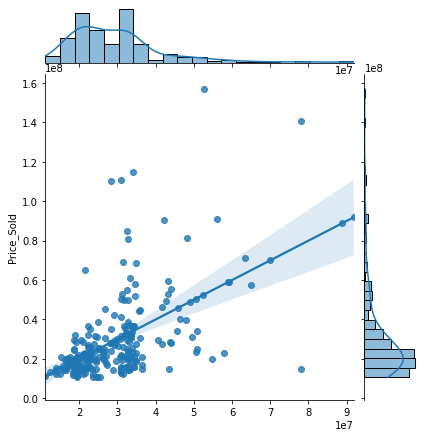

In [119]:
preds = lm.predict(X) 

sns.jointplot(x=preds,y=y, kind='reg')